In [125]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Import, Inspection, Cleaning

## Describe data, check for missing values, and check for time gaps

In [126]:
energy_data = pd.read_csv("data/energy_demand_weather_hourly_spain/energy_dataset.csv")

energy_data.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [127]:
weather_features = pd.read_csv("data/energy_demand_weather_hourly_spain/weather_features.csv")

weather_features.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


In [128]:
# Check for missing values
print(f"Missing values in energy_data, which has length of {len(energy_data)}:")
print(energy_data.isnull().sum())

print(f"\nMissing values in weather_features, which has length of {len(weather_features)}:")
print(weather_features.isnull().sum())


Missing values in energy_data, which has length of 35064:
time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable               

In [129]:
# Set up the dataset for checking time gaps
# The time is provided in spanish timezone CET
energy_data["time"] = pd.to_datetime(energy_data["time"], utc=True).dt.tz_convert('CET')

# Set time as index for easier slicing & analysis
energy_data.set_index("time", inplace=True)

# Convert and set time index for weather_features, similarly as for energy_data
weather_features["dt_iso"] = pd.to_datetime(weather_features["dt_iso"], utc=True).dt.tz_convert('CET')
weather_features.set_index("dt_iso", inplace=True)

In [130]:
# Check for time gaps in energy_data
energy_time_diff = energy_data.index.to_series().diff().value_counts()
print("Time gaps in energy_data:")
print(energy_time_diff)

# Check for time gaps in weather_features
weather_time_diff = weather_features.index.to_series().diff().value_counts()
print("\nTime gaps in weather_features:")
print(weather_time_diff)


Time gaps in energy_data:
time
0 days 01:00:00    35063
Name: count, dtype: int64

Time gaps in weather_features:
dt_iso
0 days 01:00:00         175315
0 days 00:00:00           3076
-1461 days +01:00:00         4
Name: count, dtype: int64


#### Notes and Observations
- Description of data:
    - energy_data: several columns, like "generation fossil oil shale" or "generation wind offshore" have a min/max and mean values of zero. This means these energy sources likely have negligible usage.
    - energy_data: Outside of the zeroes, the scale of the values in each column varies a lot -- some columns only max around 350 (generation waste) whereas others max around 20K (generation fossil gas). This means we will need to normalize/scale the data.
    - weather_features: The scale of the values in each column varies a lot, some columns only max around 2.3 (rain_3h) whereas others max around 1e6 (pressure). This means we will need to normalize/scale the data.
- Missing data:
    - energy_data has ~18/19 missing observations throughout the "generation" columns. I wonder if these are overlapping across columns. This is not a huge amount but needs addressing. 
    - in energy_data, both "generation hydro pumped storage aggregated" and "forecast wind offshore eday ahead" have no data, as the number of missing observations matches the length of the dataset. These can be excluded from analysis.
    - weather_features has no missing data!
- Time gaps:
    - energy_data: appears to have no time gaps greater than an hour
    - weather_features: appears to have ~3000 observations with zero hour time gaps-- maybe these are duplicates or errors. 
    - weather_features: Also has 4 observations with -1461 day gaps, not clear what this means.

## Investigate missing data and time gaps further

In [131]:
# Investigate missing data, part 2: Do missing observations in energy_data 
# overlap across columns?

# Filter out columns where missing values are equal to the dataset length
relevant_columns = energy_data.columns[energy_data.isnull().sum() < len(energy_data)]

# Check overlapping missing values across relevant columns
overlapping_missing = energy_data[relevant_columns].isnull().all(axis=1)

print("Rows where multiple 'generation' columns have missing values:")
print(energy_data[overlapping_missing])


Rows where multiple 'generation' columns have missing values:
Empty DataFrame
Columns: [generation biomass, generation fossil brown coal/lignite, generation fossil coal-derived gas, generation fossil gas, generation fossil hard coal, generation fossil oil, generation fossil oil shale, generation fossil peat, generation geothermal, generation hydro pumped storage aggregated, generation hydro pumped storage consumption, generation hydro run-of-river and poundage, generation hydro water reservoir, generation marine, generation nuclear, generation other, generation other renewable, generation solar, generation waste, generation wind offshore, generation wind onshore, forecast solar day ahead, forecast wind offshore eday ahead, forecast wind onshore day ahead, total load forecast, total load actual, price day ahead, price actual]
Index: []

[0 rows x 28 columns]


--> It appears that the missing values occur across different timestamps and are scattered across the rows. 

In [132]:
# Investigate the time gaps in weather_features, part 2

# Check zero-hour time gaps
zero_hour_gaps = weather_features.index.to_series().diff() == pd.Timedelta(hours=0)
print("Rows with zero-hour time gaps:")
print(weather_features[zero_hour_gaps])

# Check negative day gaps
negative_day_gaps = weather_features.index.to_series().diff() == pd.Timedelta(days=-1461)
print("Rows with -1461 day gaps:")
print(weather_features[negative_day_gaps])


Rows with zero-hour time gaps:
                          city_name     temp  temp_min  temp_max  pressure  \
dt_iso                                                                       
2015-01-06 04:00:00+01:00  Valencia  273.142   273.142   273.142       995   
2015-06-15 21:00:00+02:00  Valencia  289.610   288.650   290.930      1018   
2015-06-15 22:00:00+02:00  Valencia  289.240   288.150   290.370      1018   
2015-07-18 19:00:00+02:00  Valencia  299.770   298.750   300.930      1013   
2015-07-31 23:00:00+02:00  Valencia  295.890   293.710   297.590      1009   
...                             ...      ...       ...       ...       ...   
2018-12-17 08:00:00+01:00   Seville  282.830   282.150   283.150      1029   
2018-12-19 08:00:00+01:00   Seville  286.800   286.150   287.150      1024   
2018-12-19 09:00:00+01:00   Seville  284.930   283.150   286.150      1024   
2018-12-26 11:00:00+01:00   Seville  280.740   279.150   283.150      1030   
2018-12-26 12:00:00+01:00   Sevil

In [133]:
repeated_times = weather_features[weather_features.index.duplicated(keep=False)]
city_counts_at_repeated_times = repeated_times.groupby(repeated_times.index).size()
print(city_counts_at_repeated_times)
print(city_counts_at_repeated_times.unique())

dt_iso
2015-01-01 00:00:00+01:00    5
2015-01-01 01:00:00+01:00    5
2015-01-01 02:00:00+01:00    5
2015-01-01 03:00:00+01:00    5
2015-01-01 04:00:00+01:00    5
                            ..
2018-12-31 19:00:00+01:00    5
2018-12-31 20:00:00+01:00    5
2018-12-31 21:00:00+01:00    5
2018-12-31 22:00:00+01:00    5
2018-12-31 23:00:00+01:00    5
Length: 35064, dtype: int64
[ 5  6  8  7 10  9]


In [134]:
weather_features['city_name'].unique()

array(['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville'],
      dtype=object)

--> There appear to be duplicated timestamps throughout the dataset. Given there are 5 unique cities, it is alarming that
there can be >5 duplicated timestamps

In [135]:
example_timestamp = city_counts_at_repeated_times[city_counts_at_repeated_times == 10].index[0]
print(weather_features.loc[example_timestamp])


                            city_name    temp  temp_min  temp_max  pressure  \
dt_iso                                                                        
2015-10-01 02:00:00+02:00    Valencia  289.74    286.48    292.04      1021   
2015-10-01 02:00:00+02:00    Valencia  289.74    286.48    292.04      1021   
2015-10-01 02:00:00+02:00      Madrid  286.75    285.93    287.15      1021   
2015-10-01 02:00:00+02:00      Madrid  286.75    285.93    287.15      1021   
2015-10-01 02:00:00+02:00      Bilbao  285.99    282.15    288.15      1021   
2015-10-01 02:00:00+02:00      Bilbao  285.99    282.15    288.15      1021   
2015-10-01 02:00:00+02:00   Barcelona  288.68    284.82    290.93      1020   
2015-10-01 02:00:00+02:00   Barcelona  288.68    284.82    290.93      1020   
2015-10-01 02:00:00+02:00     Seville  295.50    291.15    302.15      1019   
2015-10-01 02:00:00+02:00     Seville  295.50    291.15    302.15      1019   

                           humidity  wind_speed  wi

--> The culprit is that there are exact rows duplicated. This needs to be addressed in pre-processing

In [136]:
# Investigate the time gap of -1461 days and 1 hour in the weather_features data
peculiar_rows = weather_features[weather_features.index.to_series().diff() == pd.Timedelta('-1461 days +01:00:00')]
print(peculiar_rows)

                            city_name        temp    temp_min    temp_max  \
dt_iso                                                                      
2015-01-01 00:00:00+01:00      Madrid  267.325000  267.325000  267.325000   
2015-01-01 00:00:00+01:00      Bilbao  269.657312  269.657312  269.657312   
2015-01-01 00:00:00+01:00   Barcelona  281.625000  281.625000  281.625000   
2015-01-01 00:00:00+01:00     Seville  273.375000  273.375000  273.375000   

                           pressure  humidity  wind_speed  wind_deg  rain_1h  \
dt_iso                                                                         
2015-01-01 00:00:00+01:00       971        63           1       309      0.0   
2015-01-01 00:00:00+01:00      1036        97           0       226      0.0   
2015-01-01 00:00:00+01:00      1035       100           7        58      0.0   
2015-01-01 00:00:00+01:00      1039        75           1        21      0.0   

                           rain_3h  snow_3h  clouds_all 

--> Peculiar rows with -1461 days and 1 hour can be explained by the 5 unique cities. 

#### Data Inspection Notes for Cleaning:
Handling Missing Values:
- Columns with No Data: Columns such as "generation hydro pumped storage aggregated" and "forecast wind offshore eday ahead" have no data throughout the entire dataset and should be dropped.
- Isolated Missing Values: For columns with only a few missing values (like 18 or 19 missing observations, at most 36), we can choose to fill them using a method that makes sense (mean, median, forward fill, etc.). However since they are so few in number relative to the total data frame length (36K rows), we can leave this as is for now.

Time Gaps:
- For energy_data, no action is needed as there are no significant time gaps.
- For weather_features, remove rows that are exact duplicates across all columns. This will address issues like the repeated Valencia data point shown above.

#### Data Inspection Notes for Preprocessing:
Timestamp alignment:
- Could be tricky given that there are 5 cities in the weather_feature dataset. If I want to align with energy_data, I may need to aggregate weather_feature and/or pivot the data so that each city has the same number of timestamps (and duplicate the columns). For now, lets leave it as is. 

Data Scaling:
- Significant variations in scale across the columns in both datasets may need to be normalized/standardized
- Columns with zeroes can be removed

# Data Cleaning

In [162]:
# Handling Missing Values
# Drop columns with no data
cols_to_drop = ["generation hydro pumped storage aggregated", "forecast wind offshore eday ahead"]
energy_data = energy_data.drop(columns=cols_to_drop, errors='ignore')

# Time Gaps
# Remove exact duplicate rows from weather_features
weather_features = weather_features.drop_duplicates()


# Exploratory Data Analysis (EDA)
## Patterns in Energy Consumption Over Time

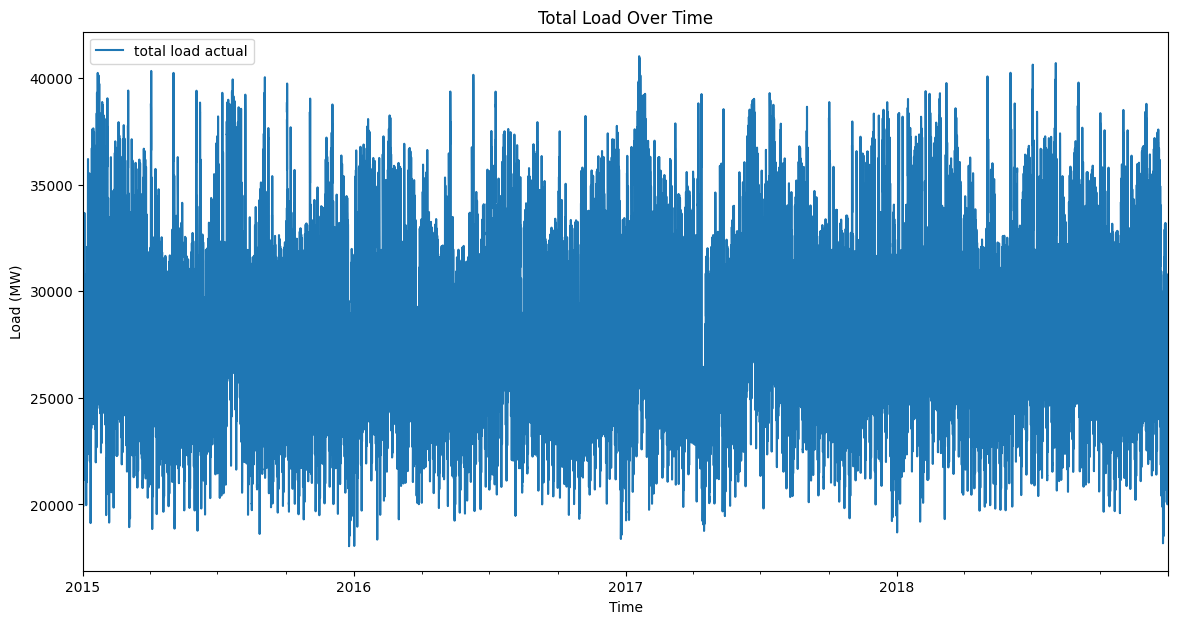

In [138]:
# General plot of total load over time
plt.figure(figsize=(14, 7))
energy_data.plot(y="total load actual", ax=plt.gca())
plt.title("Total Load Over Time")
plt.ylabel("Load (MW)")
plt.xlabel("Time")
plt.show()

In [139]:
energy_data.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind onshore day ahead', 'total load forecast',
       'total load actual', 'price day ahead', 'price actual'],
      dtype='object')

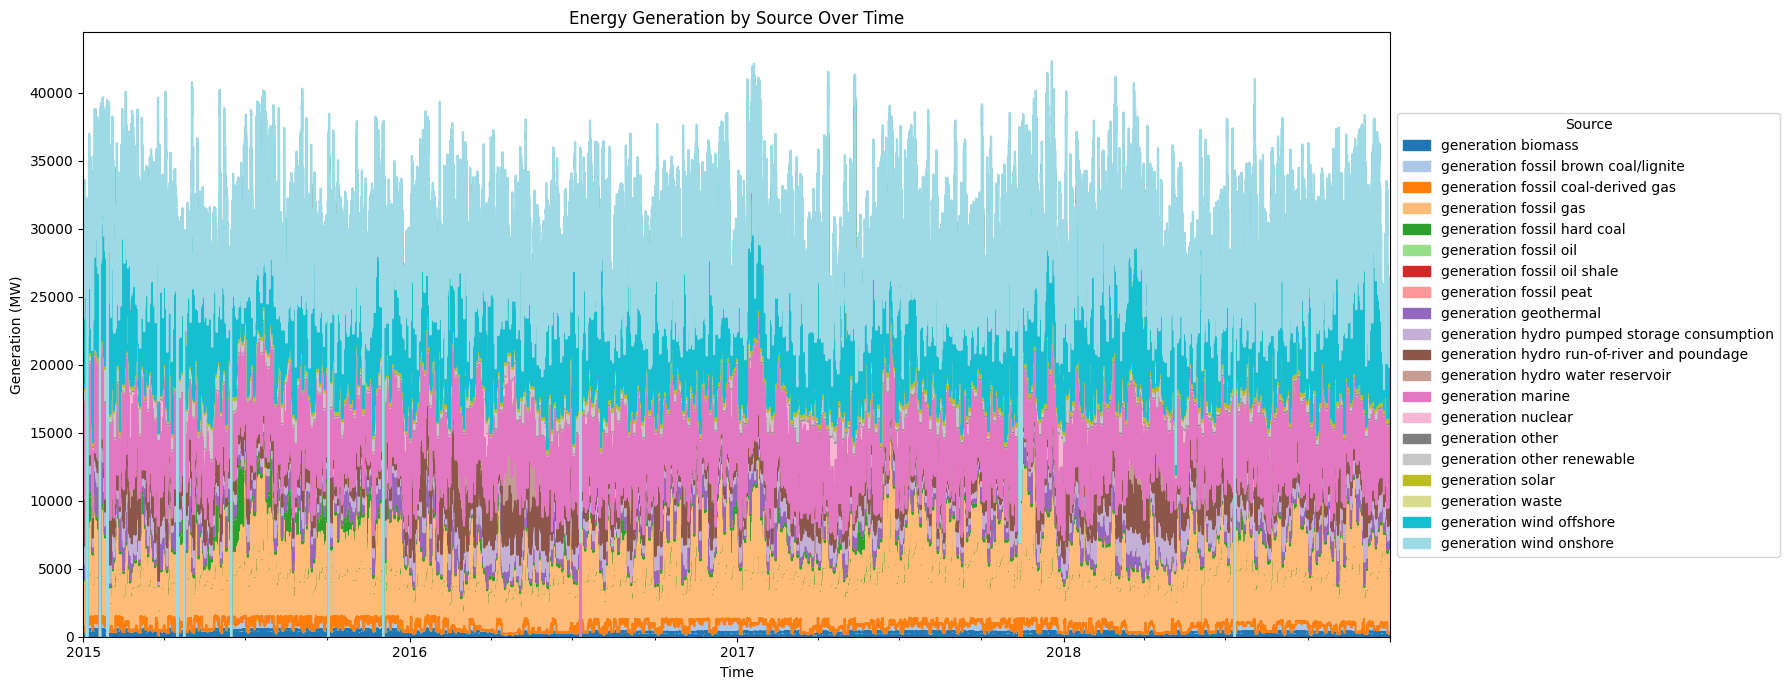

In [140]:
# Create dataframe of only the energy sources
energy_sources = energy_data.drop(columns=["forecast solar day ahead", 
                                           'forecast wind onshore day ahead', 'total load forecast', 
                                           "total load actual", 'price day ahead','price actual'])


# Define a color map - 'tab20' is a qualitative color map suitable for different categories
colors = plt.cm.tab20(np.linspace(0, 1, len(energy_sources.columns)))

plt.figure(figsize=(18, 7))
ax = energy_sources.plot.area(stacked=True, color=colors, ax=plt.gca())

# Place the legend outside the plot
ax.legend(title="Source", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Energy Generation by Source Over Time")
plt.ylabel("Generation (MW)")
plt.xlabel("Time")
plt.tight_layout()  # Ensure the plot fits well even with the legend outside
plt.show()

In [141]:
# Looking at the above plot, it may make sense to group more broadly- by fossil fuel, hydro, etc
print(energy_sources.columns)

# Regrouping data
energy_sources_grouped = pd.DataFrame({
    "Fossil Fuels": energy_sources[['generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 
                                    'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 
                                    'generation fossil oil shale', 'generation fossil peat']].sum(axis=1),
    "Hydro": energy_sources[['generation hydro pumped storage consumption',
                             'generation hydro run-of-river and poundage', 'generation hydro water reservoir']].sum(axis=1),
    "Wind & Solar": energy_sources[['generation wind offshore', 'generation wind onshore', 'generation solar', 
                                    'generation other renewable']].sum(axis=1),
    "Other": energy_sources[['generation biomass', 'generation geothermal', 'generation marine', 
                             'generation other', 'generation waste']].sum(axis=1),
    "Nuclear": energy_sources['generation nuclear']
})


Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore'],
      dtype='object')


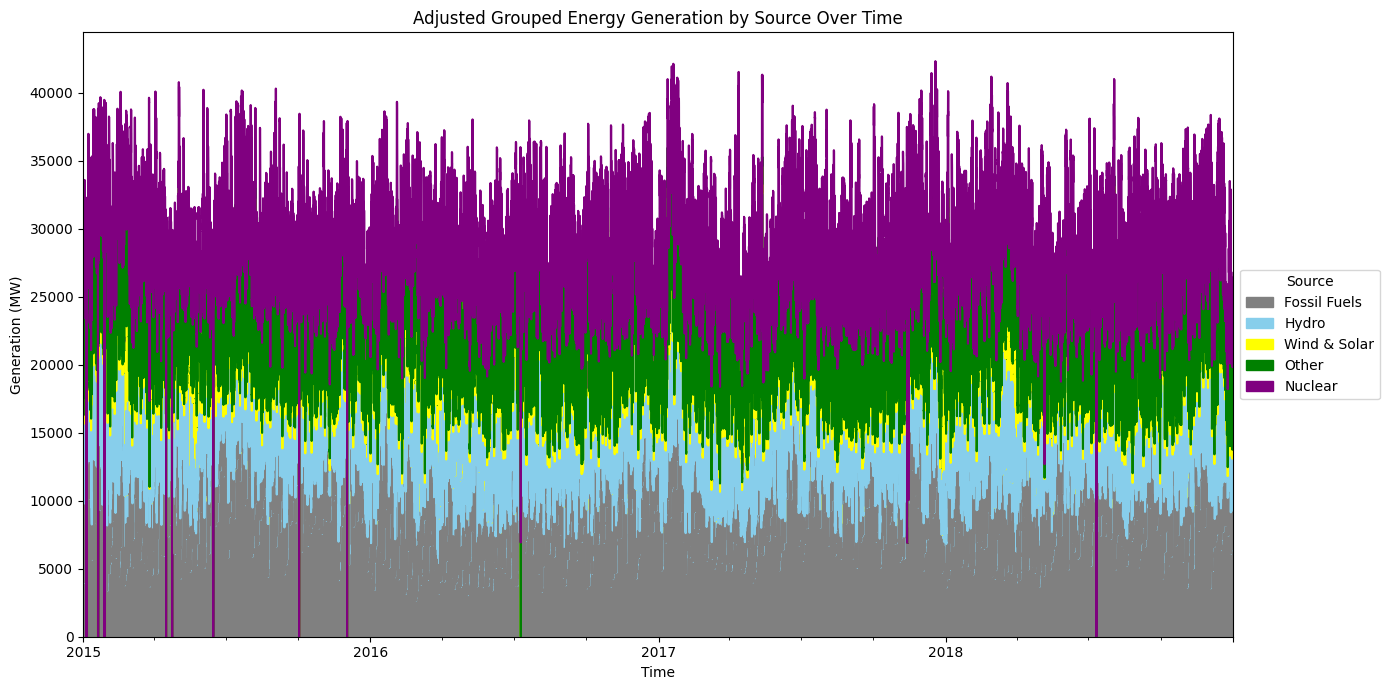

In [142]:
# Plotting the regrouped data
# Custom color mapping
custom_colors = {
    "Fossil Fuels": "gray",
    "Hydro": "skyblue",
    "Wind & Solar": "yellow",
    "Other": "green",
    "Nuclear": "purple"
}

plt.figure(figsize=(14, 7))
ax = energy_sources_grouped.plot.area(stacked=True, color=[custom_colors[col] for col in energy_sources_grouped.columns], ax=plt.gca())
ax.legend(title="Source", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Adjusted Grouped Energy Generation by Source Over Time")
plt.ylabel("Generation (MW)")
plt.xlabel("Time")
plt.tight_layout()
plt.show()


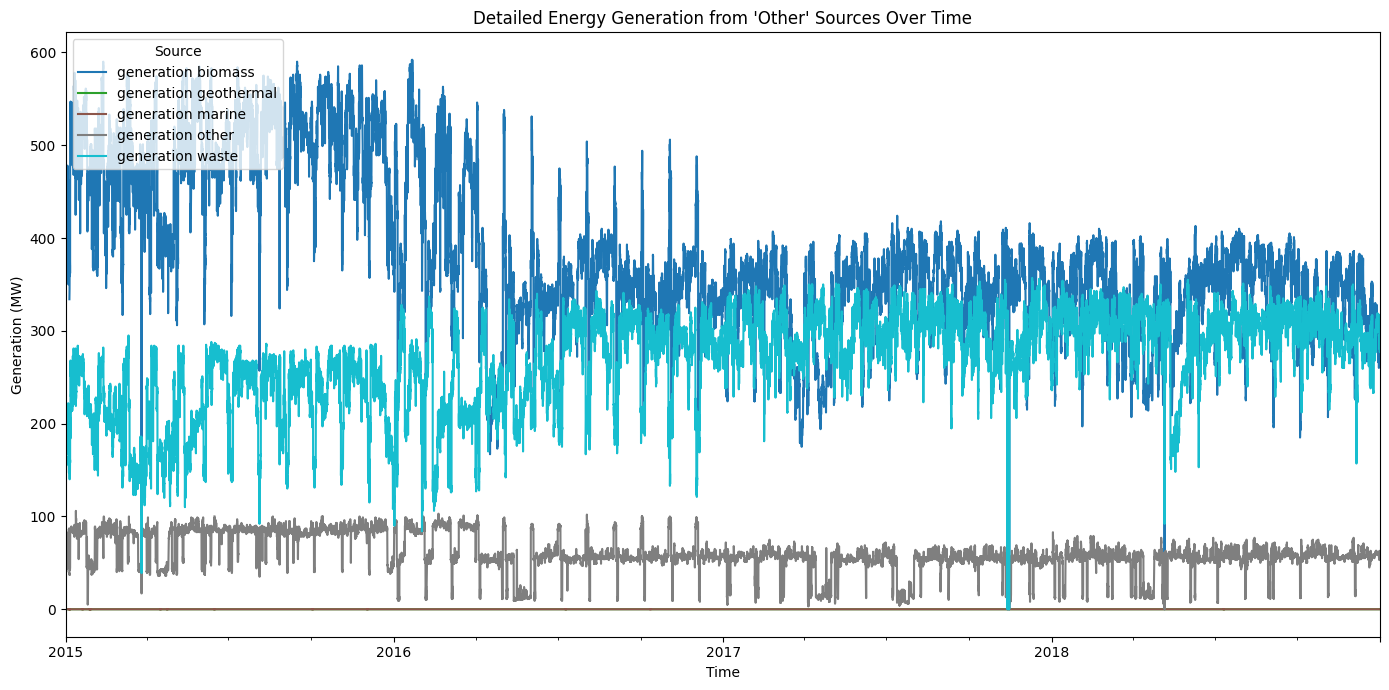

In [143]:
# The "Other" category is a larger fraction than expected, so let's zoom in on just the "Other" energy sources
# Extracting the "Other" category data
other_sources = energy_sources[['generation biomass', 'generation geothermal', 'generation marine', 
                                'generation other', 'generation waste']]

# Plotting
plt.figure(figsize=(14, 7))
colors = plt.cm.tab10(np.linspace(0, 1, len(other_sources.columns)))
other_sources.plot(ax=plt.gca(), color=colors)

plt.title("Detailed Energy Generation from 'Other' Sources Over Time")
plt.ylabel("Generation (MW)")
plt.xlabel("Time")
plt.legend(title="Source", loc="upper left")
plt.tight_layout()
plt.show()


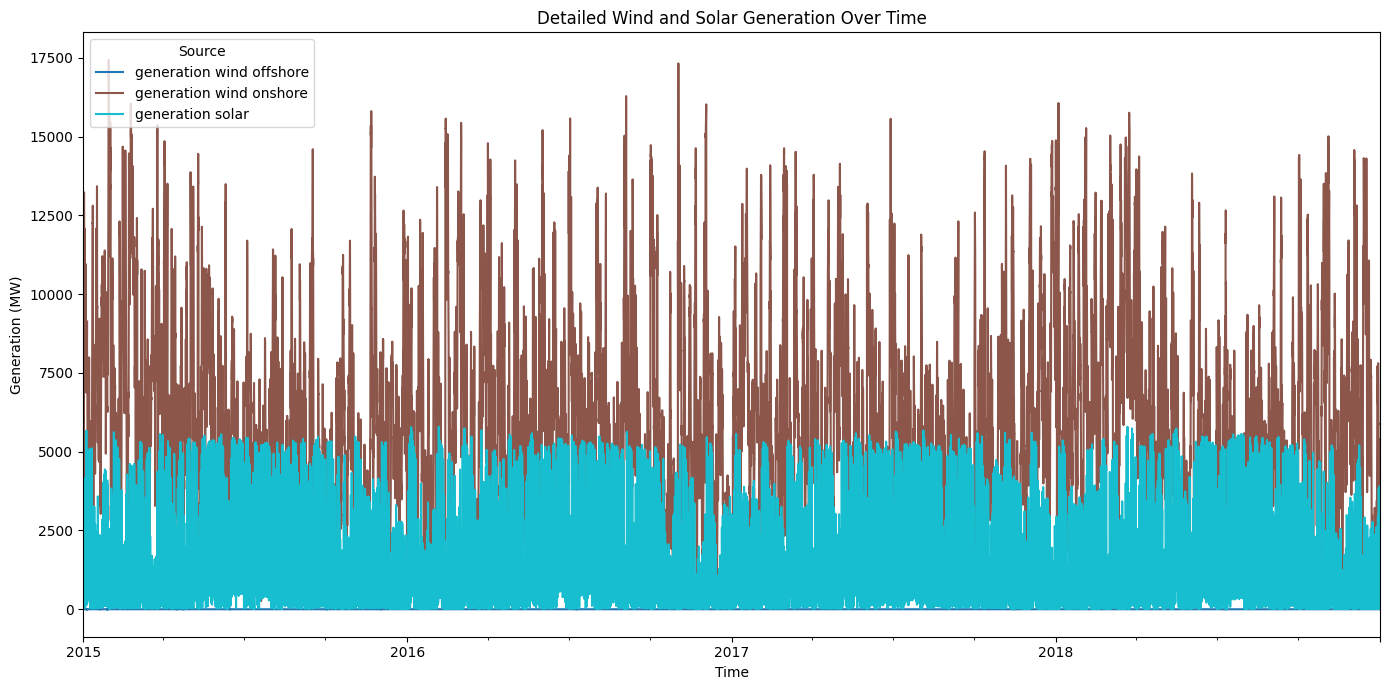

In [144]:
# Out of curiousity, I want to zoom in on the wind and solar generation sources

wind_and_solar_separate = energy_sources[["generation wind offshore", "generation wind onshore", "generation solar"]]

plt.figure(figsize=(14, 7))
colors = plt.cm.tab10(np.linspace(0, 1, len(wind_and_solar_separate.columns)))
wind_and_solar_separate.plot(ax=plt.gca(), color=colors)

plt.title("Detailed Wind and Solar Generation Over Time")
plt.ylabel("Generation (MW)")
plt.xlabel("Time")
plt.legend(title="Source", loc="upper left")
plt.tight_layout()
plt.show()


In [145]:
total_generation = energy_sources_grouped.sum(axis=1)
wind_solar = energy_sources_grouped["Wind & Solar"]
fraction_wind_solar = wind_solar / total_generation
dominant_time = fraction_wind_solar.idxmax()

print(f"Wind & Solar had the largest fraction of energy generation on {dominant_time.strftime('%Y-%m-%d')} with a fraction of {fraction_wind_solar[dominant_time]:.2%}.")


Wind & Solar had the largest fraction of energy generation on 2016-07-02 with a fraction of 57.63%.


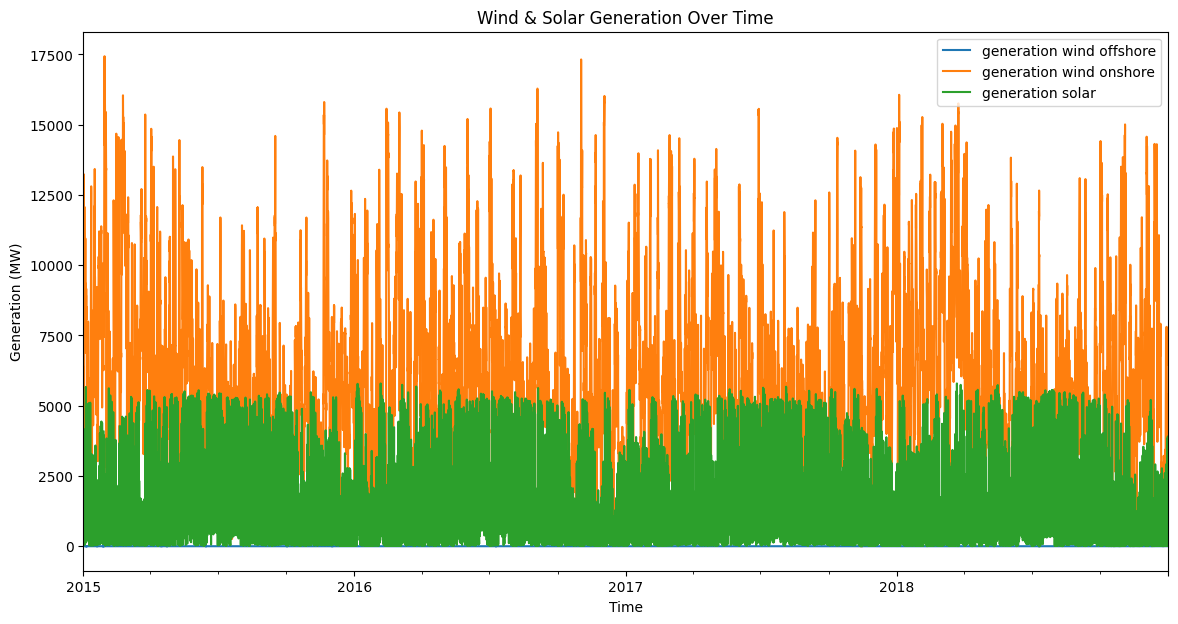

In [146]:
wind_and_solar_separate.plot(figsize=(14, 7))
plt.title("Wind & Solar Generation Over Time")
plt.ylabel("Generation (MW)")
plt.xlabel("Time")
plt.show()

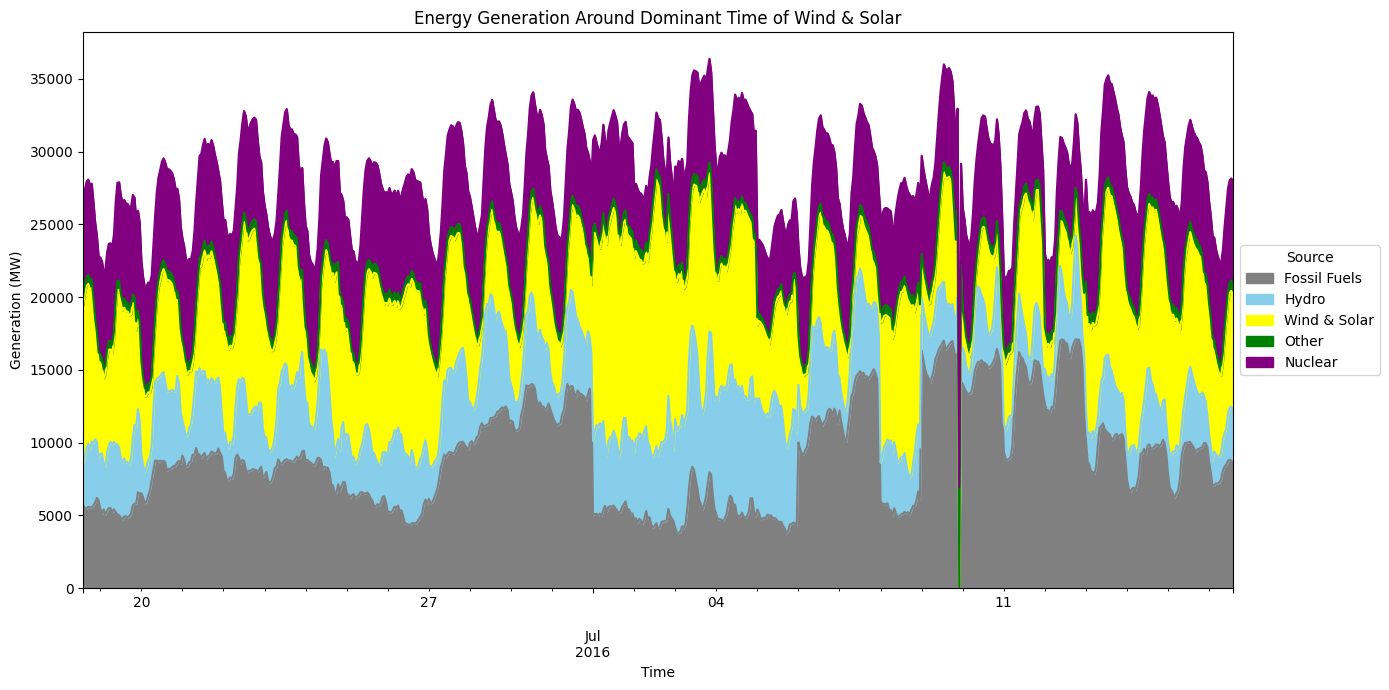

In [147]:
# Extract the time window of interest
start_date = dominant_time - timedelta(days=14)   # Two weeks before the dominant time
end_date = dominant_time + timedelta(days=14)    # Two weeks after the dominant time
subset_data = energy_sources_grouped.loc[start_date:end_date]

# Plotting
colors = plt.cm.tab10(np.linspace(0, 1, len(subset_data.columns)))

plt.figure(figsize=(14, 7))
ax = subset_data.plot.area(stacked=True, color=[custom_colors[col] for col in energy_sources_grouped.columns], ax=plt.gca())
ax.legend(title="Source", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Energy Generation Around Dominant Time of Wind & Solar")
plt.ylabel("Generation (MW)")
plt.xlabel("Time")
plt.tight_layout()
plt.show()


In [148]:
energy_sources_grouped["Wind & Solar"]

time
2015-01-01 00:00:00+01:00    6500.0
2015-01-01 01:00:00+01:00    6011.0
2015-01-01 02:00:00+01:00    5584.0
2015-01-01 03:00:00+01:00    5363.0
2015-01-01 04:00:00+01:00    5051.0
                              ...  
2018-12-31 19:00:00+01:00    3293.0
2018-12-31 20:00:00+01:00    3416.0
2018-12-31 21:00:00+01:00    3628.0
2018-12-31 22:00:00+01:00    3710.0
2018-12-31 23:00:00+01:00    3774.0
Name: Wind & Solar, Length: 35064, dtype: float64

/var/folders/x0/bk3p3l3n03dbdfrh_pj34p3r0000gp/T/ipykernel_81113/3986993842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_solar_df['hour'] = wind_solar_df.index.hour
/var/folders/x0/bk3p3l3n03dbdfrh_pj34p3r0000gp/T/ipykernel_81113/3986993842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_solar_df['year'] = wind_solar_df.index.year


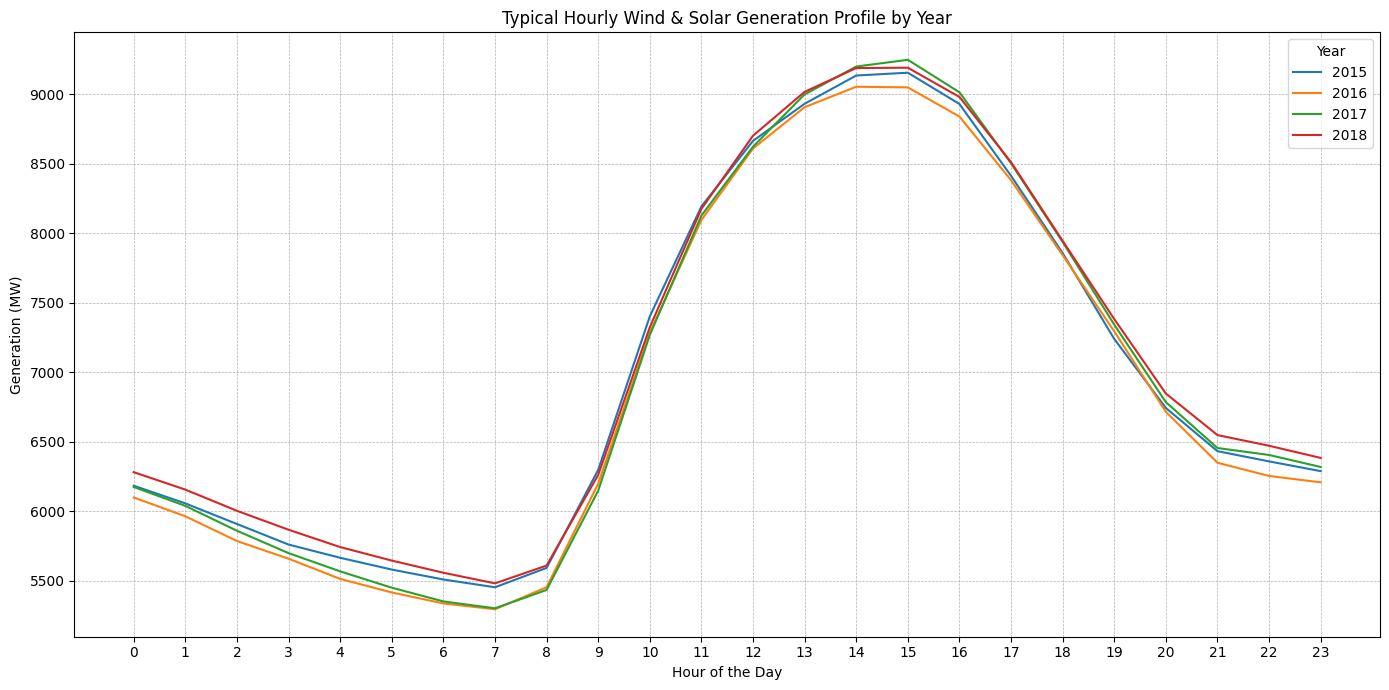

In [149]:
wind_solar_df = energy_sources_grouped[["Wind & Solar"]]

# Extract hour of the day and year directly into the wind_solar dataframe
wind_solar_df['hour'] = wind_solar_df.index.hour
wind_solar_df['year'] = wind_solar_df.index.year

# Group by year and hour
hourly_means = wind_solar_df.groupby(['year', 'hour']).mean()

# Plot
plt.figure(figsize=(14, 7))

# For each year, plot the hourly profile
for year in wind_solar_df['year'].unique():
    plt.plot(hourly_means.loc[year], label=year)

plt.title("Typical Hourly Wind & Solar Generation Profile by Year")
plt.ylabel("Generation (MW)")
plt.xlabel("Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="Year")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


/var/folders/x0/bk3p3l3n03dbdfrh_pj34p3r0000gp/T/ipykernel_81113/1270748457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['hour'] = solar_df.index.hour
/var/folders/x0/bk3p3l3n03dbdfrh_pj34p3r0000gp/T/ipykernel_81113/1270748457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['year'] = solar_df.index.year


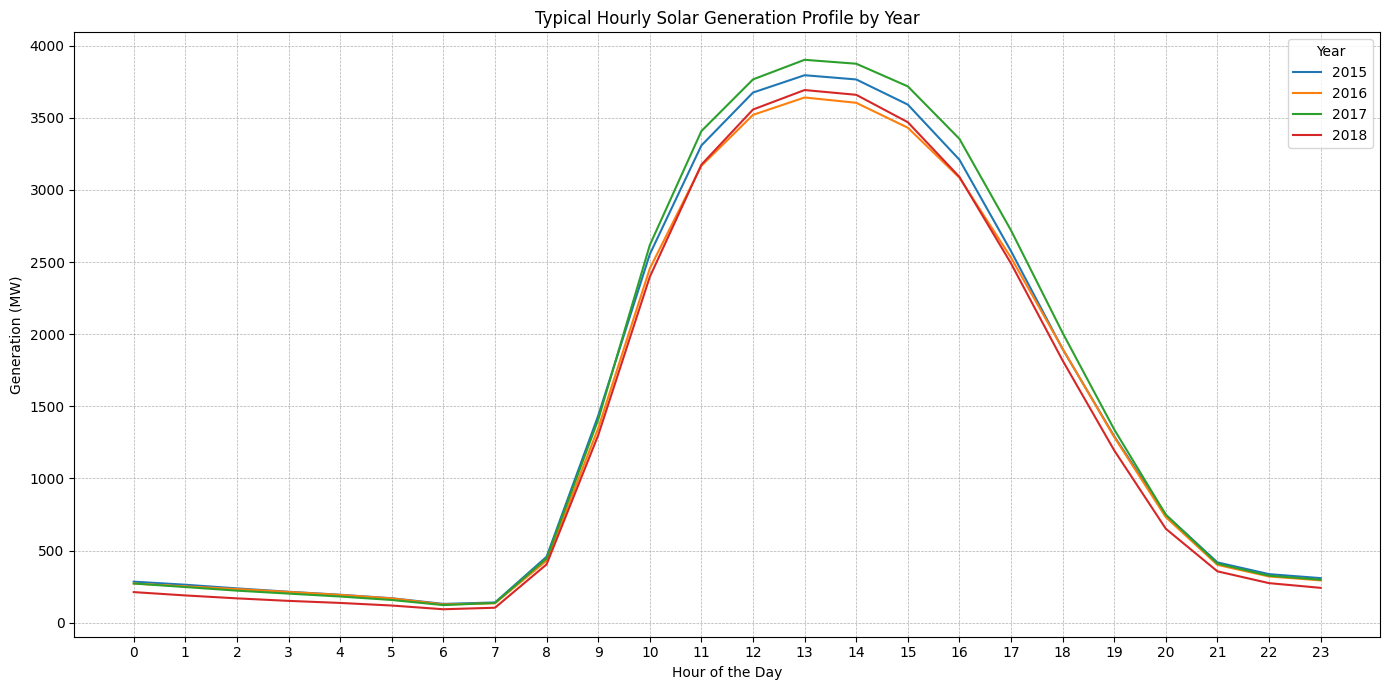

In [150]:
solar_df = energy_sources[["generation solar"]]

# Extract hour of the day and year directly into the wind_solar dataframe
solar_df['hour'] = solar_df.index.hour
solar_df['year'] = solar_df.index.year

# Group by year and hour
hourly_means = solar_df.groupby(['year', 'hour']).mean()

# Plot
plt.figure(figsize=(14, 7))

# For each year, plot the hourly profile
for year in solar_df['year'].unique():
    plt.plot(hourly_means.loc[year], label=year)

plt.title("Typical Hourly Solar Generation Profile by Year")
plt.ylabel("Generation (MW)")
plt.xlabel("Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="Year")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

#### Notes and Observations
- Wind and solar make up a relatively small portion of the Spanish energy grid. Of the two, onshore wind generation is the larger portion
    - Wind and solar generation do not appear to increase year-over year. I was expecting some increase year-over-year as renewables become cheaper to make and install. This appears true when looking at solar alone as well. 
    - Despite solar prices going down, the grid does not appear to have had a significant increase in solar production
- Fossil fuels make up approx 25% of the grid make up
- Nuclear is a large portion, almost half of the energy grid make up
- Hydro makes up a larger portion than I was expecting
- Biomass and waste are small but important components to the energy grid make up

## Temporal Analysis
- Seasonal Patterns in energy_data
- Weekday vs. weekend

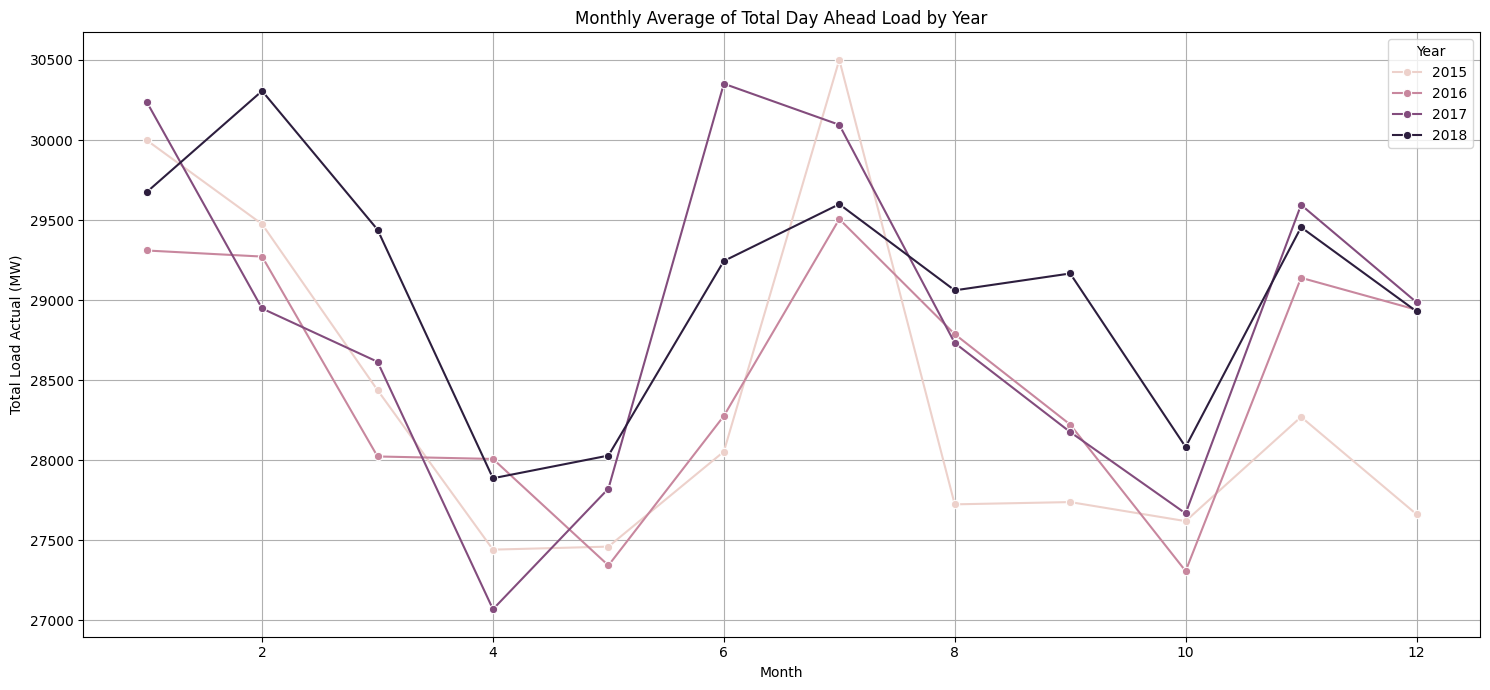

In [151]:
# Extract month and year from the datetime index
energy_data['Month'] = energy_data.index.month
energy_data['Year'] = energy_data.index.year

# Group by month and year and take the mean
monthly_avg = energy_data.groupby(['Year', 'Month'])['total load actual'].mean().reset_index()

# Plot
plt.figure(figsize=(15, 7))
sns.lineplot(x='Month', y='total load actual', hue='Year', data=monthly_avg, marker="o")
plt.title('Monthly Average of Total Day Ahead Load by Year')
plt.ylabel('Total Load Actual (MW)')
plt.xlabel('Month')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


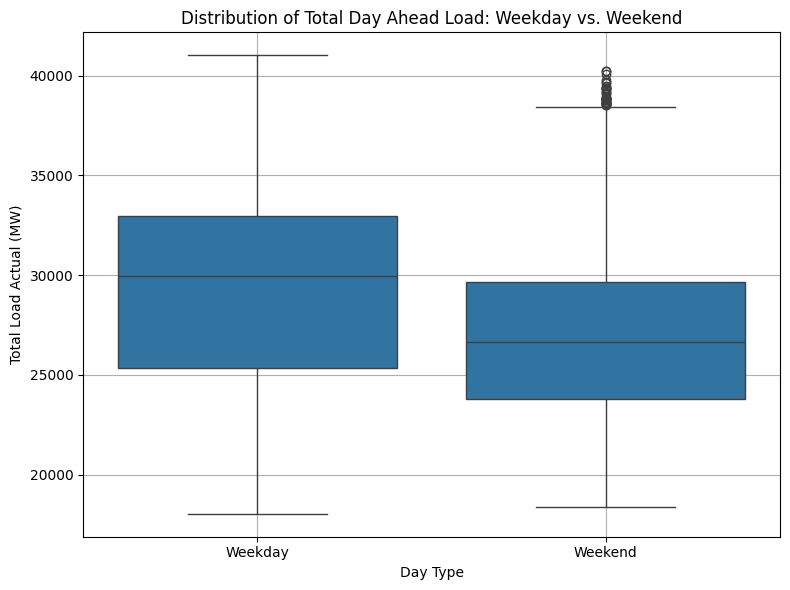

In [152]:
# Extract weekday from the datetime index (0 = Monday, 6 = Sunday)
energy_data['Weekday'] = energy_data.index.weekday

# Define a function to categorize days
def categorize_day(x):
    if x < 5:
        return 'Weekday'
    else:
        return 'Weekend'

energy_data['Day_Type'] = energy_data['Weekday'].apply(categorize_day)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Day_Type', y='total load actual', data=energy_data)
plt.title('Distribution of Total Day Ahead Load: Weekday vs. Weekend')
plt.ylabel('Total Load Actual (MW)')
plt.xlabel('Day Type')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Notes and Observations:
- Some seasonality to the energy data. There is a bit of a duck curve shape. For example, June, July and August has a total load peak, and so does January/February. This makes sense when you consider the weather is probably most extreme in these months, requiring additional load for heating or cooling. The annual peak sometimes occurs in sometimes June, sometimes July, and sometimes February. 
- Weekday load is generally higher than weekend load. There are some outliers in the weekend load that were higher than typically expected. 

## Load Distribution

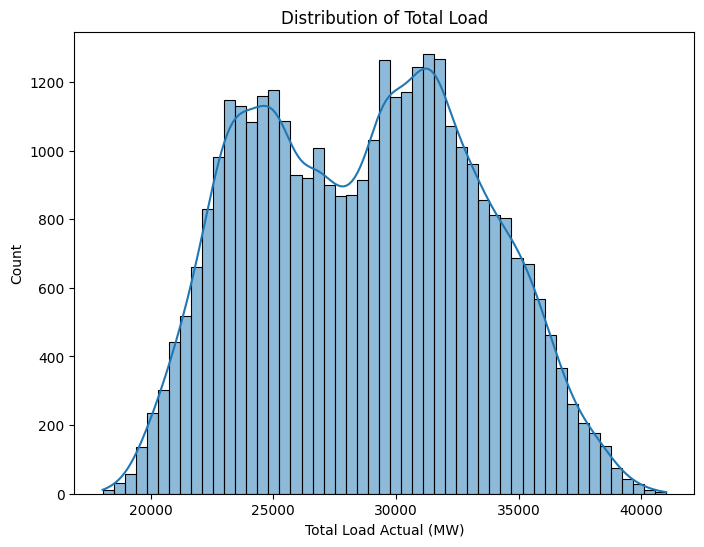

In [180]:
## Load Distribution
plt.figure(figsize=(8, 6))
sns.histplot(energy_data['total load actual'], kde=True)
plt.title('Distribution of Total Load')
plt.xlabel('Total Load Actual (MW)')
plt.show()

Notes And Observations:
- Peaks around 23000-25000 as well as 29000-32000 MW. Between the peaks is a significant dip

## Weather Data Exploration
- Temperature Distribution Across Cities

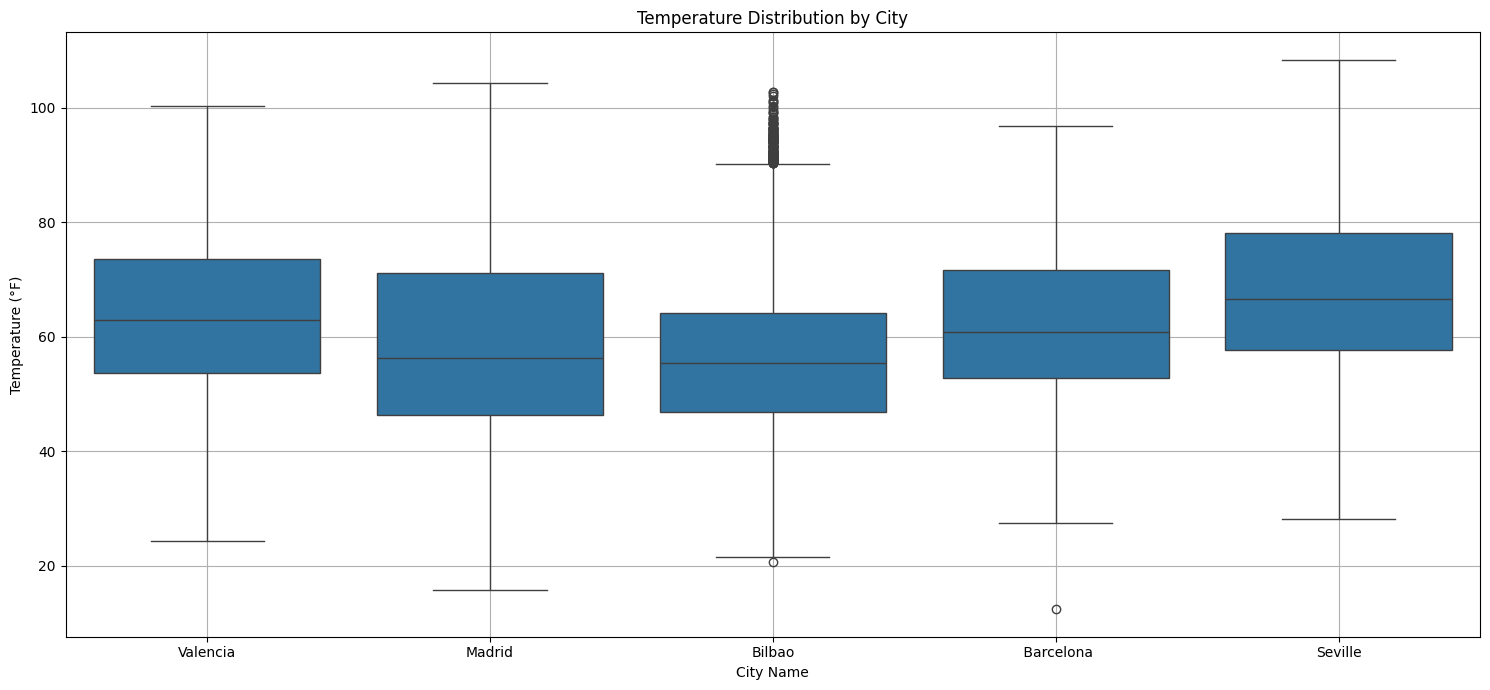

In [153]:
# Convert temperature from Kelvin to Fahrenheight
weather_features['temp_F'] = (weather_features['temp'] - 273.15) * 9/5 + 32


# Plot
plt.figure(figsize=(15, 7))
sns.boxplot(x='city_name', y='temp_F', data=weather_features)
plt.title('Temperature Distribution by City')
plt.ylabel('Temperature (°F)')
plt.xlabel('City Name')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Notes and Observations
- Seville tends to have warmer weather than the other cities
- Bilbao tends to have cooler weather than the other cities, though Madrid is very similar. Madrid's weather appears to have more of a spread than Bilbao.
- Overall, the weather is typically pleasant across all the cities, with most days hovering between 50-78°F depending on the city.
- All the cities have had some extreme weather events -- times where the temperature exceeded 100°F, and occasionally times where the temperature approached freezing. Madrid saw days where temperature dropped well below freezing.
- Madrid had the widest range of values

## Correlation Analysis: Load vs. Weather
- Specifically looking at the impact of temperature on load to begin with

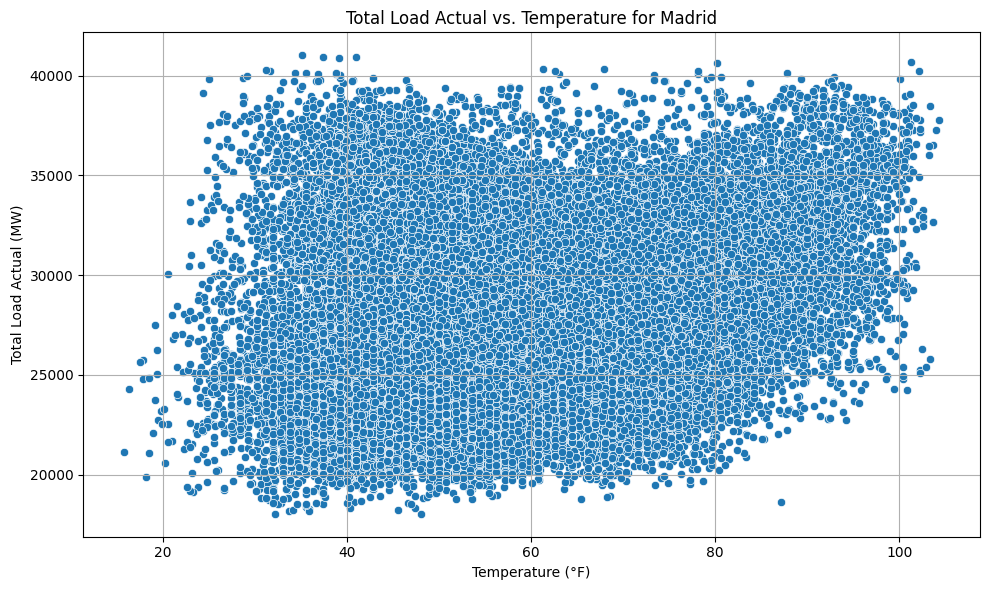

In [198]:
# Filtering data for a specific city, e.g., "Valencia"
# Note, Barcelona has a space at the start (ie " Barcelona") in the original data
# Madrid has the widest range of values so can be a good starting point
city = 'Madrid'

city_data = weather_features[weather_features['city_name'] == city]
merged_data = energy_data.merge(city_data, left_index=True, right_index=True)
merged_data = merged_data.reset_index(drop=True) # Reset the index as some duplicates may come up 


# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_F', y='total load actual', data=merged_data)
plt.title(f'Total Load Actual vs. Temperature for {city}')
plt.ylabel('Total Load Actual (MW)')
plt.xlabel('Temperature (°F)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Load at Extreme Temperatures

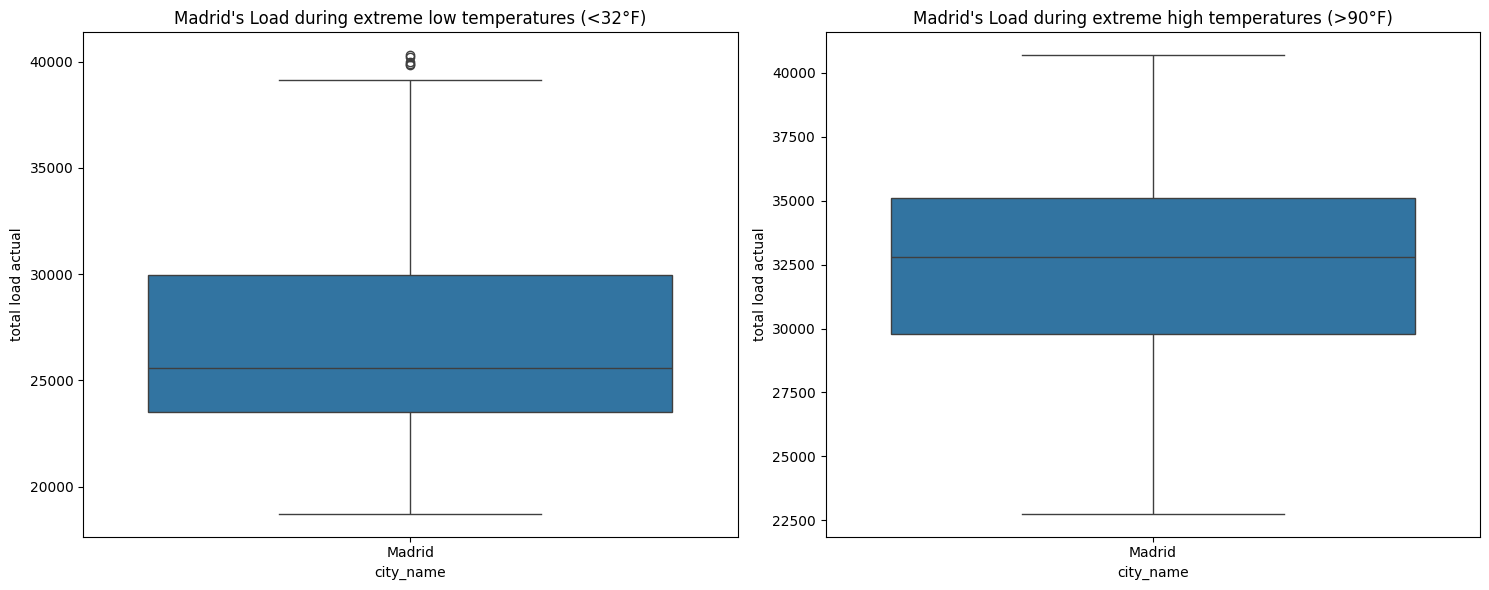

In [199]:
# Recall the following is based on the one city specified above.

# Extract data for extreme temperatures
extreme_low = merged_data[merged_data['temp_F'] < 32]
extreme_high = merged_data[merged_data['temp_F'] > 90]

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=extreme_low, x='city_name', y='total load actual')
plt.title(f"{city}'s Load during extreme low temperatures (<32°F)")

plt.subplot(1, 2, 2)
sns.boxplot(data=extreme_high, x='city_name', y='total load actual')
plt.title(f"{city}'s Load during extreme high temperatures (>90°F)")
plt.tight_layout()
plt.show()


### Correlation matrix

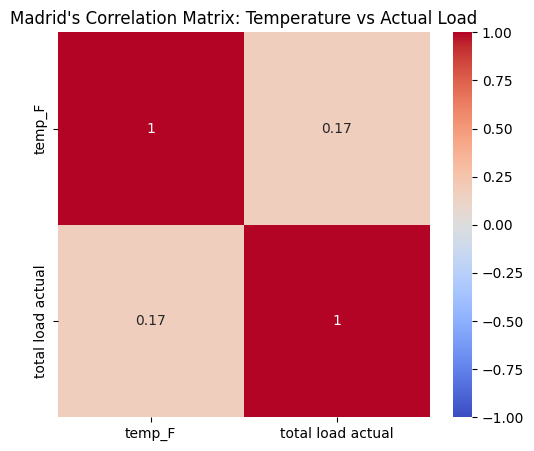

In [200]:
# Recall the following is based on the one city specified above.
correlation_matrix = merged_data[['temp_F', 'total load actual']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f"{city}'s Correlation Matrix: Temperature vs Actual Load")
plt.show()


#### Notes and Observations
- Across all cities, there is a general trend in the load vs temperature data: it seems to me that there are two peaks, one around 30-40°F and one towards 85-100+°F, indicating the relationship is non-linear
- The true peak is generally at the higher temperatures (not the case for Bilbao)
- Something interesting happens when temperatures are really cold. Most of the time, there is a lower load, but some extreme cases had high energy loads. 
- Madrid has a correlation coefficient of 0.17 between temp_F and total load actual
- Valencia has a correlation coefficient of 0.21 between temp_F and total load actual
- Barcelona has a correlation coefficient of 0.17 between temp_F and total load actual
- Bilbao has a correlation coefficient of 0.20 between temp_F and total load actual
- Seville has a correlation coefficient of 0.20 between temp_F and total load actual

# Data Preprocessing

There are some observations in weather_features which are duplicated. Im not sure why this is. From first glance, perhaps the only differences are weather_main and weather_description.. would be good to understand

## Data Scaling
A commonly used method is Min-Max Scaling (Normalization) which scales the data between 0 and 1. Another method is the Standard Scaler (Standardization) which scales the data based on mean and standard deviation.

In [ ]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
#min_max_scaler = MinMaxScaler()
#energy_data_minmax = pd.DataFrame(min_max_scaler.fit_transform(energy_data), columns=energy_data.columns)
#weather_features_minmax = pd.DataFrame(min_max_scaler.fit_transform(weather_features.select_dtypes(include=[np.number])), columns=weather_features.select_dtypes(include=[np.number]).columns)

# Standard Scaling
#standard_scaler = StandardScaler()
#energy_data_standard = pd.DataFrame(standard_scaler.fit_transform(energy_data), columns=energy_data.columns)
#weather_features_standard = pd.DataFrame(standard_scaler.fit_transform(weather_features.select_dtypes(include=[np.number])), columns=weather_features.select_dtypes(include=[np.number]).columns)


## Removing columns with zeroes or constant values

In [ ]:

# Remove columns with constant values from energy_data
#energy_data = energy_data.loc[:, (energy_data != energy_data.iloc[0]).any()]
# Remove columns with constant values from weather_features
#weather_features = weather_features.loc[:, (weather_features != weather_features.iloc[0]).any()]


# Model Selection Training & Verification
We'll start with KNN as that is one of the simplest time-series forecasting models we could use and then work to a random forest model

## KNN

## Random Forest

# Benchmarking Against TSO

# Insights & Next Steps